In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ign-games-from-best-to-worst/IGN games from best to worst.csv


In [2]:
df = pd.read_csv('/kaggle/input/ign-games-from-best-to-worst/IGN games from best to worst.csv')

In [3]:
df.head(10)

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25
5,Grand Theft Auto IV (Special Edition),10.0,Masterpiece,Xbox 360,Action,2008,4,29
6,Grand Theft Auto IV (Special Edition),10.0,Masterpiece,PlayStation 3,Action,2008,4,29
7,Grand Theft Auto V,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2013,9,16
8,Grand Theft Auto V,10.0,Masterpiece,Xbox 360,"Action, Adventure",2013,9,16
9,Grand Theft Auto V,10.0,Masterpiece,PlayStation 4,"Action, Adventure",2014,11,17


In [4]:
df.count()

title            18625
score            18625
score_phrase     18625
platform         18625
genre            18589
release_year     18625
release_month    18625
release_day      18625
dtype: int64

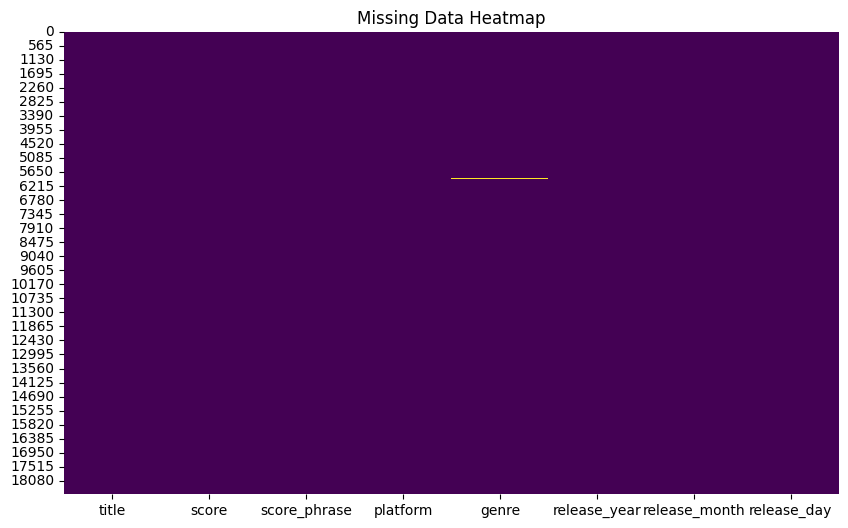

In [5]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [6]:
df['release_year']

0        1999
1        2011
2        2001
3        2008
4        2008
         ... 
18620    1997
18621    2001
18622    2009
18623    1998
18624    2003
Name: release_year, Length: 18625, dtype: int64

In [7]:
df['score_phrase'].unique()

array(['Masterpiece', 'Amazing', 'Great', 'Good', 'Okay', 'Mediocre',
       'Bad', 'Awful', 'Painful', 'Unbearable', 'Disaster'], dtype=object)

In [8]:
df['genre'].fillna("Not Known", inplace=True)

/tmp/ipykernel_18/1042637373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genre'].fillna("Not Known", inplace=True)


In [9]:
df['genre'].isnull().sum()

0

In [10]:
df.head(5)

,title,score,score_phrase,platform,genre,release_year,release_month,release_day
0,Checkered Flag,10.0,Masterpiece,Lynx,Racing,1999,7,6
1,Chrono Trigger,10.0,Masterpiece,Wii,"Action, RPG",2011,5,25
2,Dragon Warrior III,10.0,Masterpiece,Game Boy Color,RPG,2001,7,20
3,Grand Theft Auto IV,10.0,Masterpiece,Xbox 360,"Action, Adventure",2008,4,25
4,Grand Theft Auto IV,10.0,Masterpiece,PlayStation 3,"Action, Adventure",2008,4,25


# Content Diversity Analysis

In [11]:
content_diversity = {}

# Calculate count of unique values for each attribute
content_diversity['title'] = df['title'].nunique()
content_diversity['score_phrase'] = df['score_phrase'].nunique()
content_diversity['Genre'] = df['genre'].nunique()
content_diversity['Platform'] = df['platform'].nunique()
content_diversity['Release_Year'] = df['release_year'].nunique()
content_diversity['Release_Month'] = df['release_month'].nunique()
content_diversity['Release_Day'] = df['release_day'].nunique()


# Print content diversity metrics
for attribute, count in content_diversity.items():
    print(f"Unique {attribute}: {count}")

Unique title: 12589
Unique score_phrase: 11
Unique Genre: 113
Unique Platform: 59
Unique Release_Year: 22
Unique Release_Month: 12
Unique Release_Day: 31


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18625 entries, 0 to 18624
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          18625 non-null  object 
 1   score          18625 non-null  float64
 2   score_phrase   18625 non-null  object 
 3   platform       18625 non-null  object 
 4   genre          18625 non-null  object 
 5   release_year   18625 non-null  int64  
 6   release_month  18625 non-null  int64  
 7   release_day    18625 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 1.1+ MB


# Release Frequency of Games Over the Years

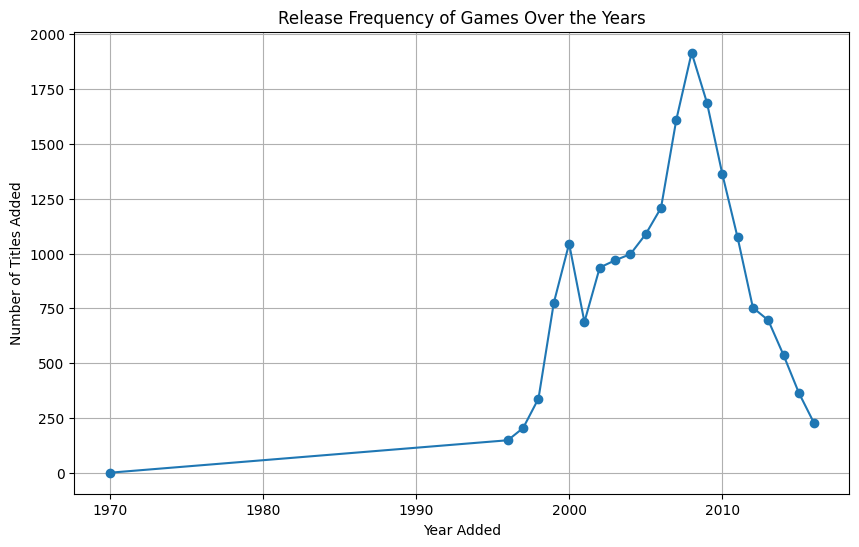

In [13]:

content_growth_rate = df.groupby('release_year').size().reset_index(name = 'count')

# print(content_growth_rate)

plt.figure(figsize=(10, 6))
plt.plot(content_growth_rate['release_year'], content_growth_rate['count'], marker='o')
plt.title('Release Frequency of Games Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

# Top 10 Genre Distribution

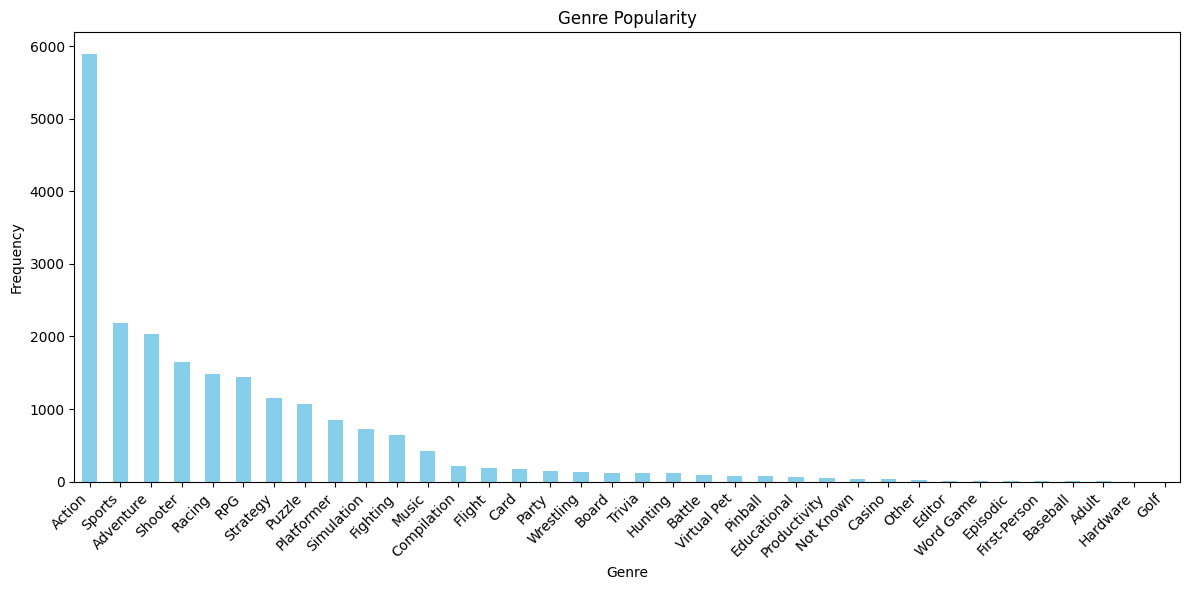

In [14]:
# Split the 'genre' column into separate genres
genres = df['genre'].str.split(', ', expand=True).stack()

# Count the frequency of each genre
genre_popularity = genres.value_counts()

# Plot genre popularity
plt.figure(figsize=(12, 6))
genre_popularity.plot(kind='bar', color='skyblue')
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

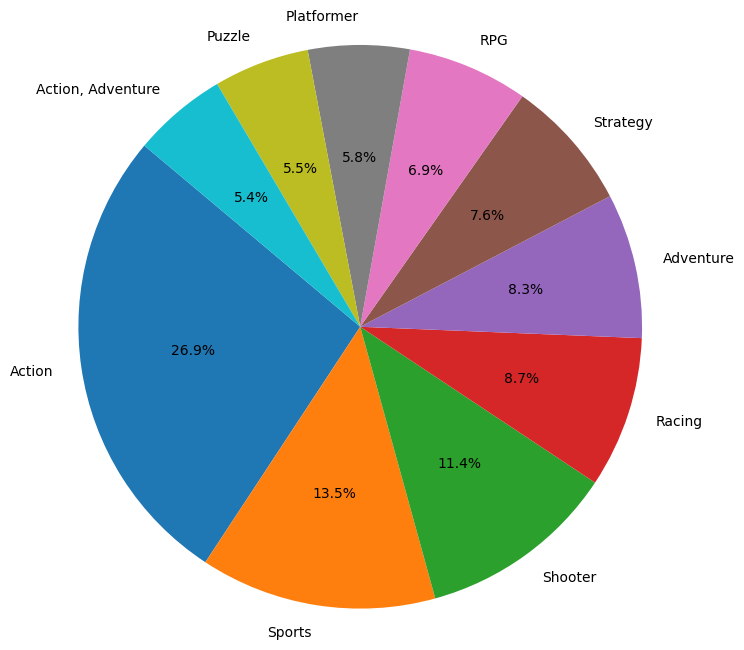

In [15]:
# Assuming df is your DataFrame with the 'Main Genre' column
genre_counts = df['genre'].value_counts().sort_values(ascending=False).head(10)

# Plot a pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Top 10 Genres Over the Years

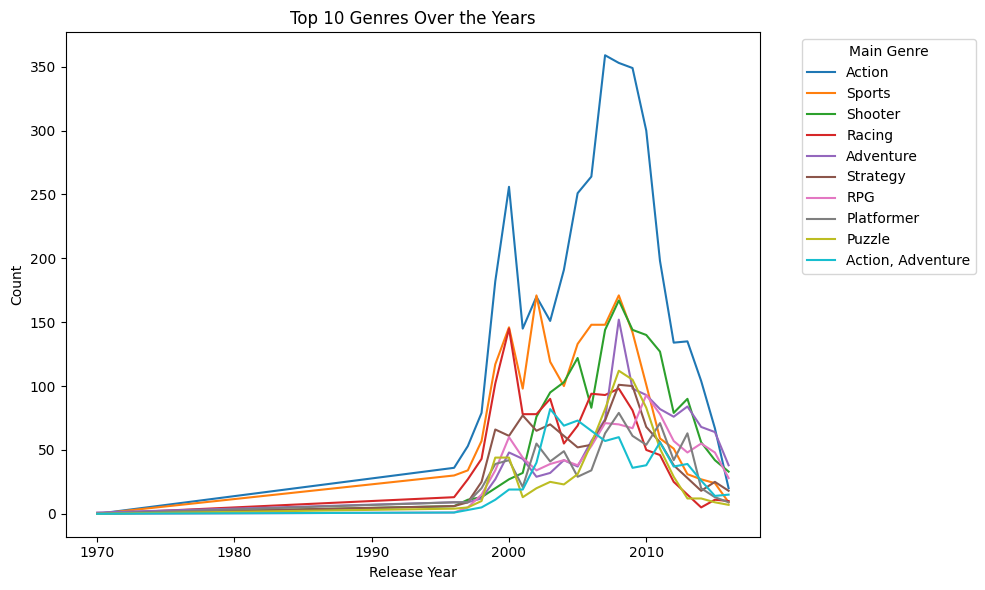

In [16]:
# Assuming df is your DataFrame with columns 'release_year' and 'Main Genre'
genre_counts = df.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Sum up the counts for each genre over all years
genre_counts_total = genre_counts.sum(axis=0)

# Sort the genres based on their total counts and select the top 10
top_genres = genre_counts_total.nlargest(10).index

# Filter the genre_counts DataFrame to include only the top 10 genres
top_genre_counts = genre_counts[top_genres]

# Plot the count of top 10 genres over the years
top_genre_counts.plot(kind='line', figsize=(10, 6))
plt.title('Top 10 Genres Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Main Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

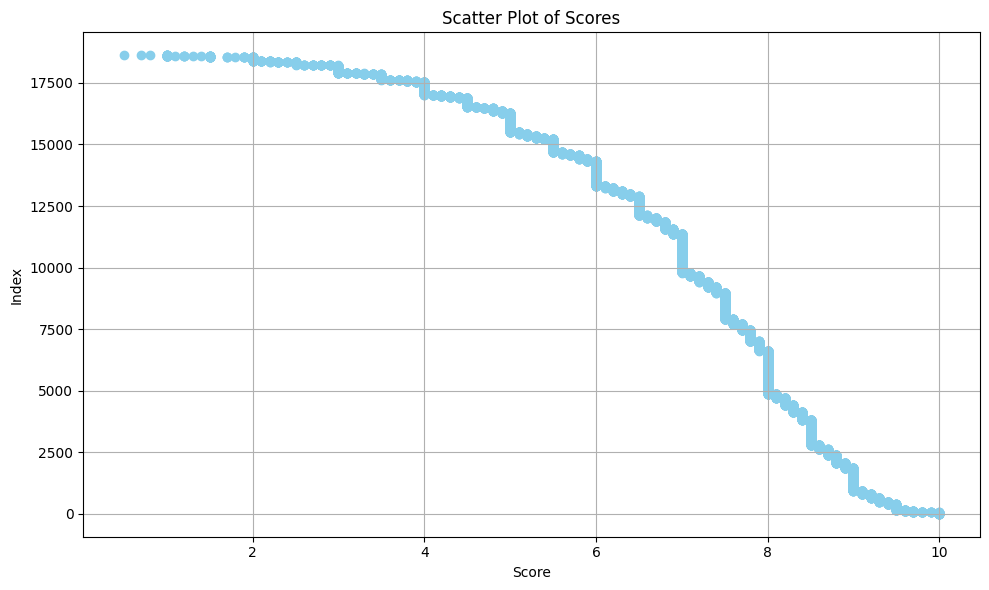

In [17]:
# Plot a scatter plot of scores
plt.figure(figsize=(10, 6))
plt.scatter(df['score'], df.index, color='skyblue')
plt.title('Scatter Plot of Scores')
plt.xlabel('Score')
plt.ylabel('Index')
plt.grid(True)
plt.tight_layout()
plt.show()

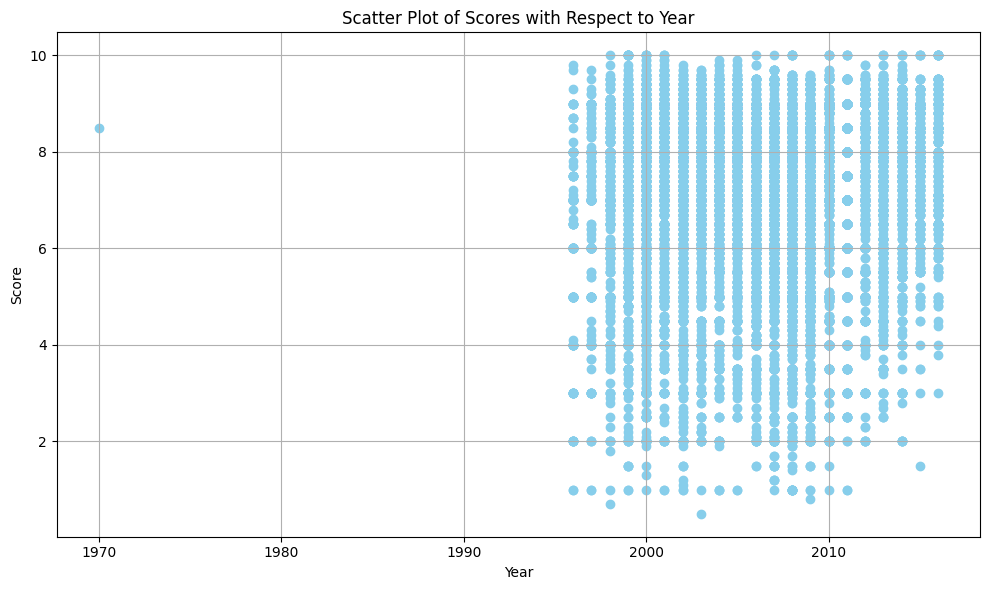

In [18]:
# Plot a scatter plot of scores w.r.t. year
plt.figure(figsize=(10, 6))
plt.scatter(df['release_year'], df['score'], color='skyblue')
plt.title('Scatter Plot of Scores with Respect to Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.grid(True)
plt.tight_layout()
plt.show()

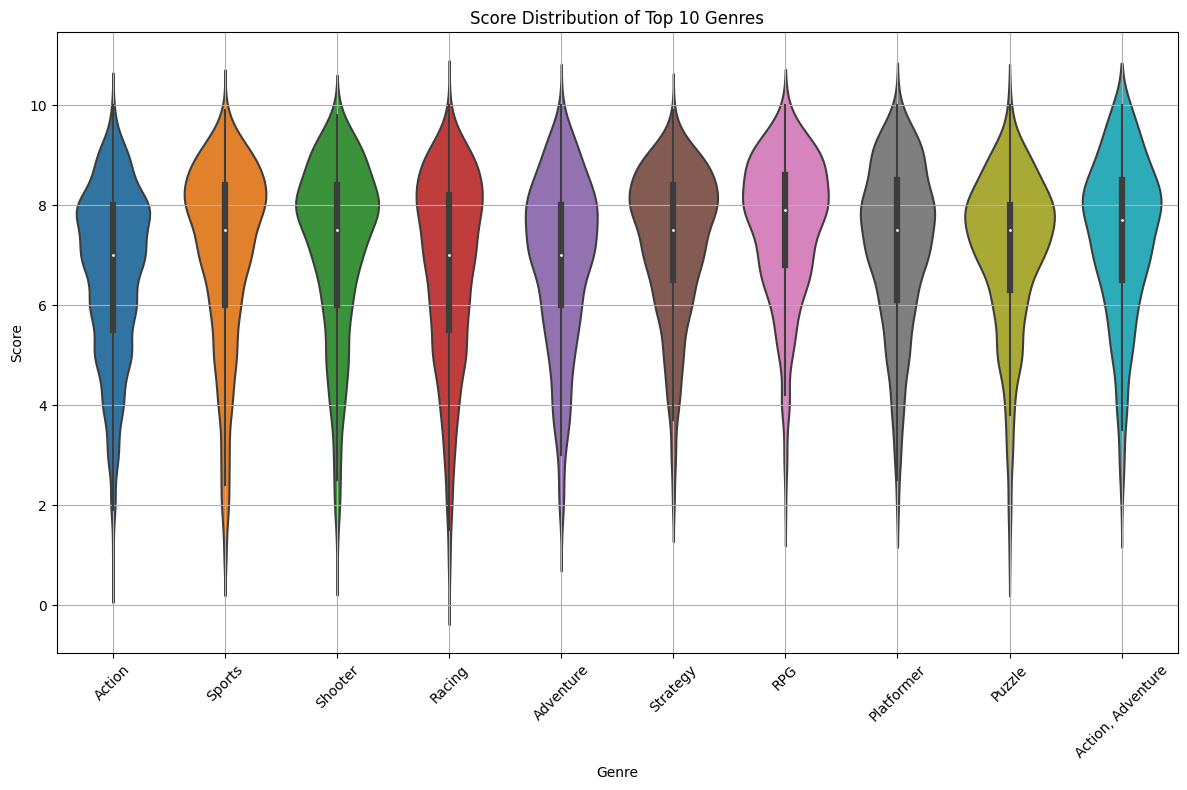

In [19]:
# Group by genre and calculate the volume of each genre
genre_volume = df['genre'].value_counts()

# Select the top 10 genres based on volume
top_10_genres = genre_volume.head(10).index

# Filter the DataFrame to include only the top 10 genres
df_top_10 = df[df['genre'].isin(top_10_genres)]

# Create a violin plot for the score distribution of each genre
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_top_10, x='genre', y='score', order=top_10_genres)
plt.title('Score Distribution of Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Score Distribution of Games 

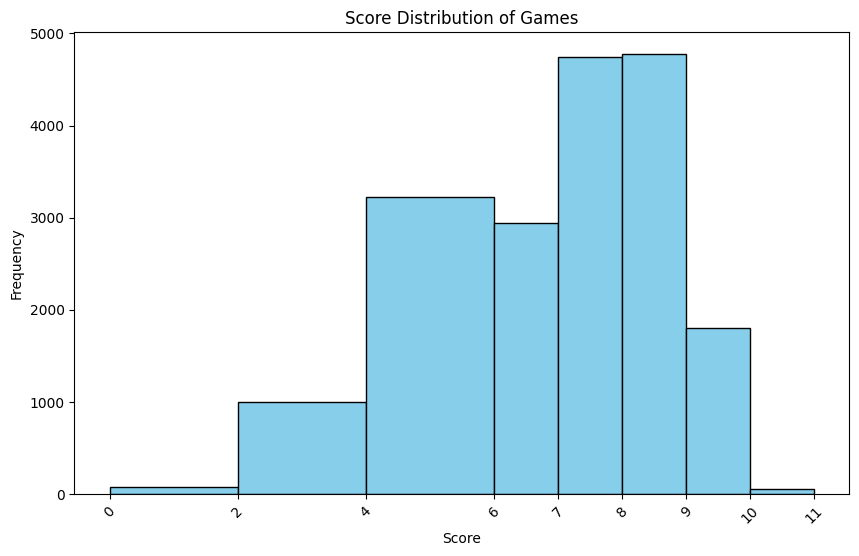

In [20]:
# Define score categories
# score_categories = ['Masterpiece', 'Amazing', 'Great', 'Good', 'Okay', 'Mediocre', 'Bad', 'Awful', 'Painful', 'Unbearable', 'Disaster']

# Define score bins
score_bins = [0, 2, 4, 6, 7, 8, 9, 10,11]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=score_bins, color='skyblue', edgecolor='black')
plt.title('Score Distribution of Games')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(score_bins, rotation=45)
plt.show()

# Top 10 Platforms by Average Score

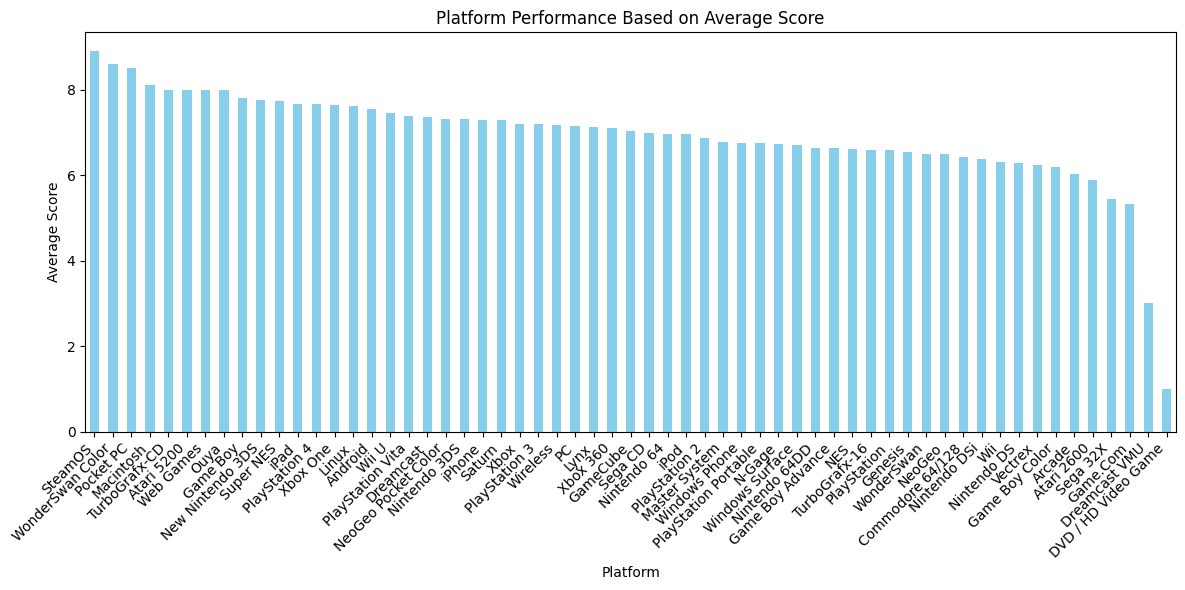

In [21]:
# Group by platform and calculate the average score
platform_performance = df.groupby('platform')['score'].mean().sort_values(ascending=False)

# Plot platform performance
plt.figure(figsize=(12, 6))
platform_performance.plot(kind='bar', color='skyblue')
plt.title('Platform Performance Based on Average Score')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

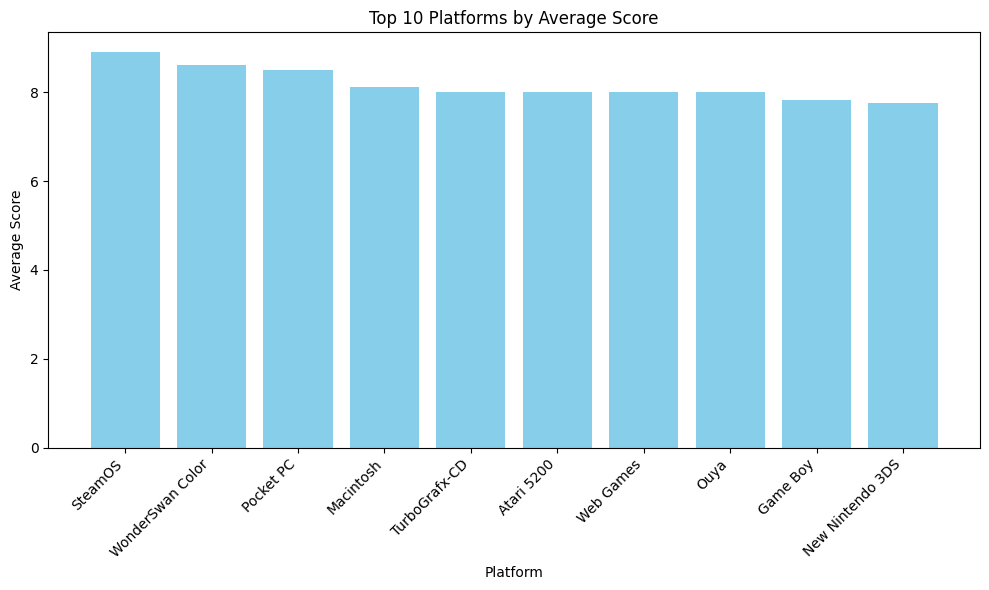

In [22]:
# Group by platform and calculate the mean score for each platform
platform_avg_score = df.groupby('platform')['score'].mean().reset_index()

# Sort the platforms by average score in descending order
platform_avg_score = platform_avg_score.sort_values(by='score', ascending=False)

top10 = platform_avg_score.head(10)

# Plot the average score for each platform
plt.figure(figsize=(10, 6))
plt.bar(top10['platform'], top10['score'], color='skyblue')
plt.title('Top 10 Platforms by Average Score')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

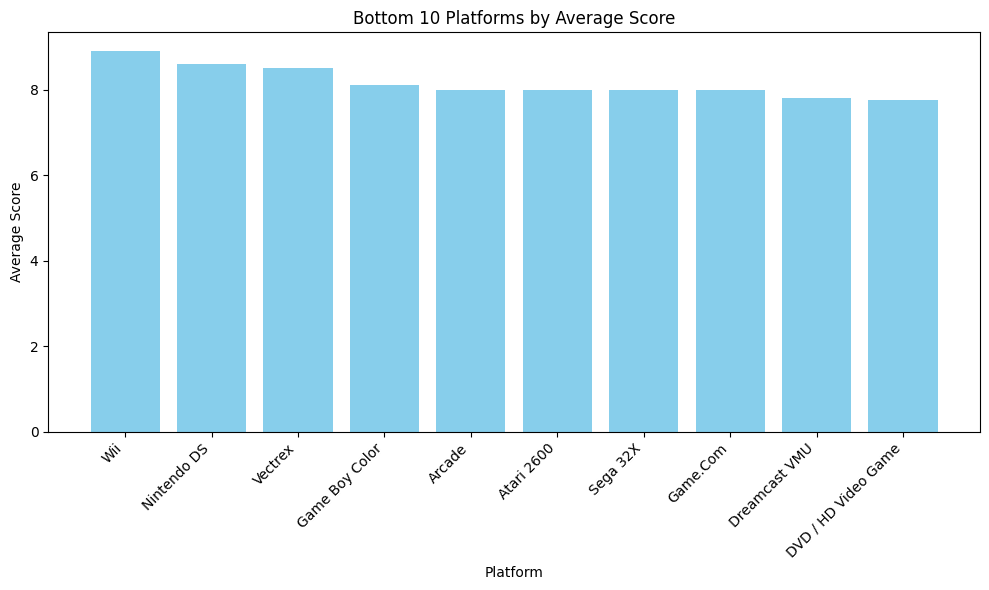

In [23]:
# Group by platform and calculate the mean score for each platform
platform_avg_score = df.groupby('platform')['score'].mean().reset_index()

# Sort the platforms by average score in descending order
platform_avg_score = platform_avg_score.sort_values(by='score', ascending=False)

bottom10 = platform_avg_score.tail(10)

# Plot the average score for each platform
plt.figure(figsize=(10, 6))
plt.bar(bottom10['platform'], top10['score'], color='skyblue')
plt.title('Bottom 10 Platforms by Average Score')
plt.xlabel('Platform')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
df.columns

Index(['title', 'score', 'score_phrase', 'platform', 'genre', 'release_year',
       'release_month', 'release_day'],
      dtype='object')

# Seasonality in Game Release

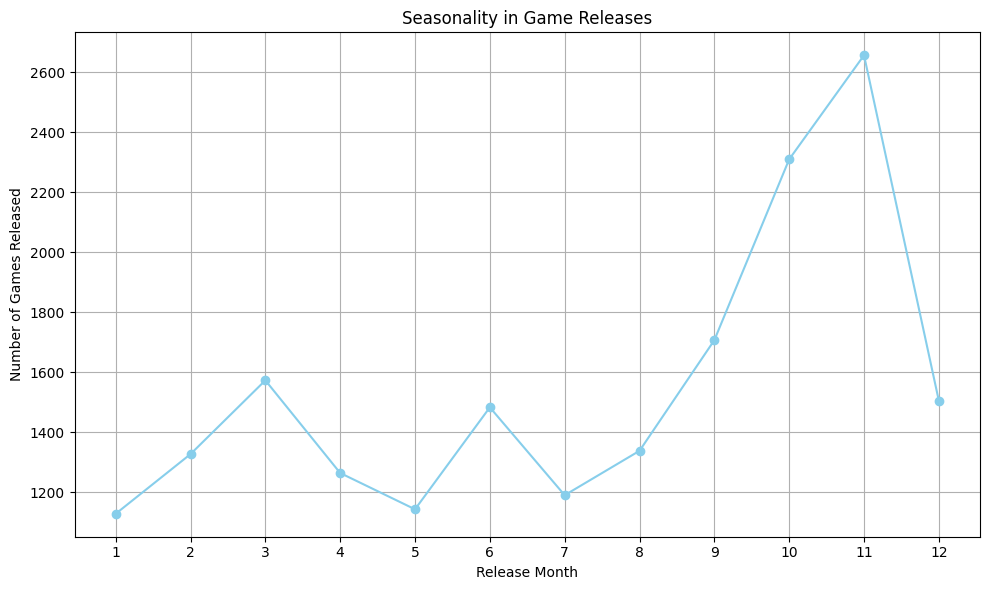

In [25]:
# Group by release month and count the number of games released each month
release_seasonality = df.groupby('release_month').size().reset_index(name='count')

# Plot the seasonality in releases
plt.figure(figsize=(10, 6))
plt.plot(release_seasonality['release_month'], release_seasonality['count'], marker='o', color='skyblue', linestyle='-')
plt.title('Seasonality in Game Releases')
plt.xlabel('Release Month')
plt.ylabel('Number of Games Released')
plt.xticks(range(1, 13))  # Assuming release months are from 1 to 12
plt.grid(True)
plt.tight_layout()
plt.show()

# Score Trends Over Time

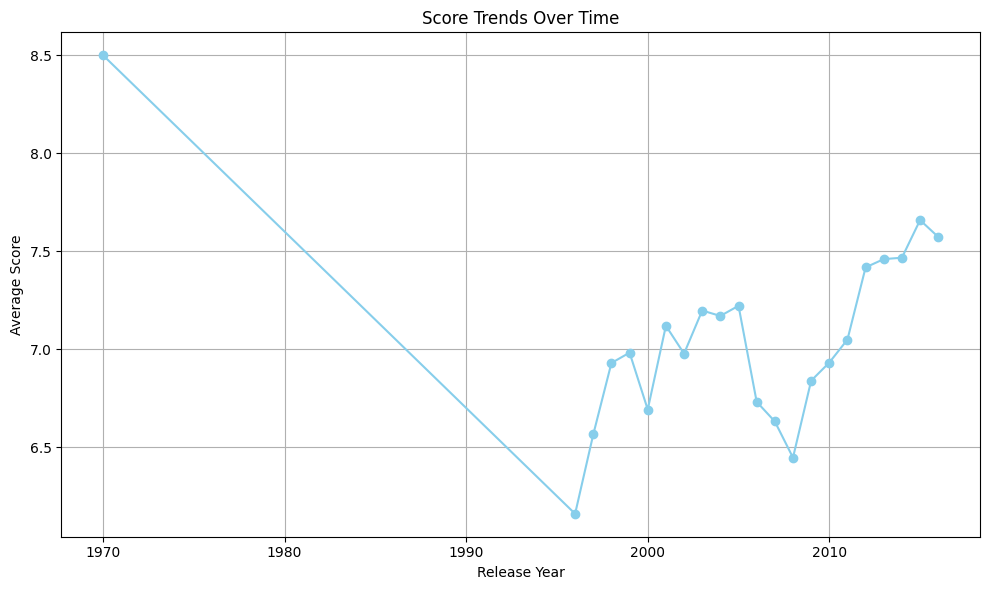

In [26]:
# Group by release year and calculate the average score
score_trends = df.groupby('release_year')['score'].mean()

# Plot the score trends over time
plt.figure(figsize=(10, 6))
plt.plot(score_trends.index, score_trends.values, marker='o', color='skyblue', linestyle='-')
plt.title('Score Trends Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.tight_layout()
plt.show()

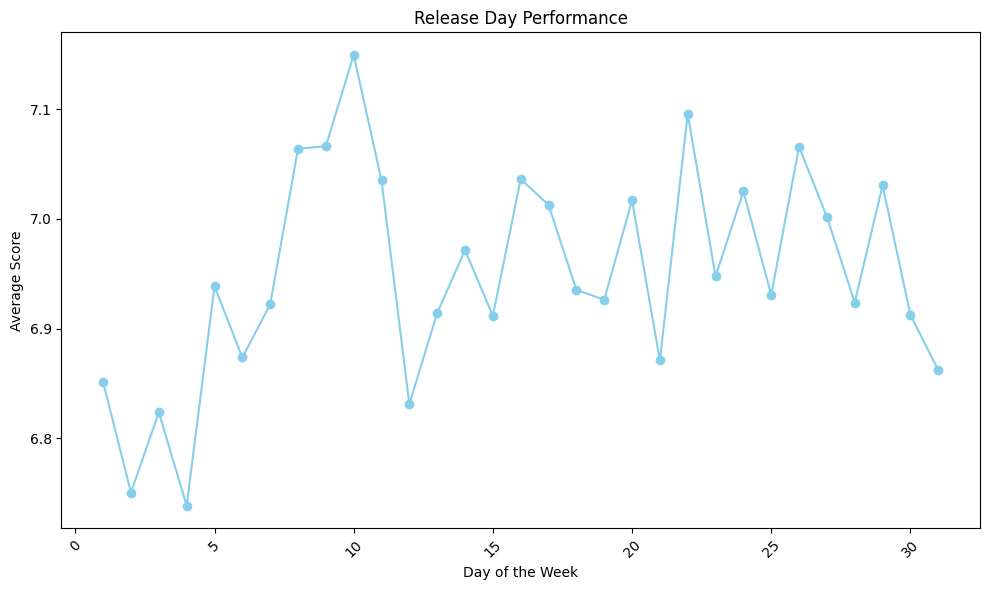

In [27]:
# Plotting Release Day Performance
plt.figure(figsize=(10, 6))
ax = df.groupby('release_day')['score'].mean().plot(marker='o', color='skyblue')
plt.title('Release Day Performance')
plt.xlabel('Day of the Week')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()
plt.show()